In [32]:
import numpy as np
import pandas as pd

In [33]:

dataset = pd.read_csv('train.csv',dtype={"Monthly_Balance":str})


# Data Processing
## Data Description


ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments

Amount_invested_monthly: Represents the monthly amount invested by the customer

Payment_Behaviour: Represents the payment behavior of the customer

Monthly_Balance:Represents the monthly balance amount of the customer

Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))

In [35]:
def count():
    occurrences = {}

# Calculer les occurrences pour chaque colonne
    for column in dataset.columns:
        occurrences[column] = dataset[column].value_counts(dropna=False)

# Afficher les occurrences de chaque valeur par colonne
    for column, counts in occurrences.items():
        print(f"\nColumn: {column}")
        print(counts)

count()


Column: ID
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64

Column: Customer_ID
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

Column: Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

Column: Name
Name
NaN               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: count, Length: 10140, dtype: int64

Column: Age
Age
38      2833
28      2829
31 

on commence par la suppression des colonnes qui ont un aspect personnel unitaire .

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [37]:
# Réinitialiser l'index pour éviter les conflits
dataset = dataset.reset_index(drop=True)

# Convertir Age en numérique, gérer les erreurs
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')

# Fonction pour corriger les valeurs aberrantes dans Age
def replace_invalid_age(group):
    valid_age = group['Age'][(group['Age'] > 0) & (group['Age'] < 100)]  # Âges valides < 100
    if not valid_age.empty:
        replacement_value = valid_age.iloc[0]  # Première valeur valide trouvée
        group['Age'] = group['Age'].apply(lambda x: replacement_value if pd.isnull(x) or x <= 0 or x >= 100 else x)
    return group

# Appliquer uniquement à la colonne 'Age' groupée par Customer_ID et Name
dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_age)

# Réinitialiser l'index final
dataset = dataset.reset_index(drop=True)

# Sauvegarder le DataFrame corrigé
dataset.to_csv("age_corrige.csv", index=False)

print("Les âges aberrants ont été corrigés.")


C:\Users\adnan\AppData\Local\Temp\ipykernel_40732\2142705844.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_age)


Les âges aberrants ont été corrigés.


In [38]:
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1628a,CUS_0x1000,January,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.94109,244.75028300769162,Low_spent_Large_value_payments,252.9247932365056,Standard
1,0x1628b,CUS_0x1000,February,NaN,17.0,913-74-1218,Lawyer,30625.94,NaN,6,...,Bad,1562.91,29.439759,10 Years and 3 Months,Yes,42.94109,176.13256665597928,High_spent_Small_value_payments,311.542509588218,Poor
2,0x1628c,CUS_0x1000,March,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94_,2706.161667,6,...,Bad,1562.91,38.285928,10 Years and 4 Months,Yes,42.94109,109.05651876486915,High_spent_Medium_value_payments,368.61855747932816,Poor
3,0x1628d,CUS_0x1000,April,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.843081,10 Years and 5 Months,Yes,42.94109,87.90990881495769,!@9#%8,419.7651674292397,Poor
4,0x1628e,CUS_0x1000,May,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.330508,10 Years and 6 Months,Yes,42.94109,191.8347674990596,Low_spent_Large_value_payments,305.8403087451377,Poor


In [40]:
count()


Column: ID
ID
0x1628a    1
0x17f6c    1
0x2449e    1
0x1434d    1
0x1434c    1
          ..
0x1e83d    1
0x1e83c    1
0x1e83b    1
0x1e83a    1
0x25b01    1
Name: count, Length: 100000, dtype: int64

Column: Customer_ID
Customer_ID
CUS_0x1000    8
CUS_0x8cfe    8
CUS_0x8cbe    8
CUS_0x8cc1    8
CUS_0x8cc5    8
             ..
CUS_0x4f3b    8
CUS_0x4f3e    8
CUS_0x4f41    8
CUS_0x4f43    8
CUS_0xffd     8
Name: count, Length: 12500, dtype: int64

Column: Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

Column: Name
Name
NaN                   9985
Langep                  44
Stevex                  44
Vaughanl                39
Jessicad                39
                      ... 
Marcyb                   4
Olesya Dmitracovaq       4
Vinocurw                 4
Rhys Jonesp              4
Timothyl                 3
Name: count, Length: 10140, dtype: int64

C

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [42]:
def replace_invalid_occupation(group):
    # Exclure les valeurs invalides '_______'
    valid_occupations = group['Occupation'][group['Occupation'] != '_______']
    if not valid_occupations.empty:  # S'il y a des valeurs valides
        most_frequent = valid_occupations.mode()[0]  # Prendre la valeur la plus fréquente (modale)
        group['Occupation'] = group['Occupation'].apply(lambda x: most_frequent if x == '_______' else x)
    return group

# Appliquer la correction groupée par Customer_ID et Name
dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_occupation)
dataset = dataset.reset_index(drop=True)



C:\Users\adnan\AppData\Local\Temp\ipykernel_40732\3031165415.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_occupation)


In [43]:
count()


Column: ID
ID
0x1628a    1
0x17f6c    1
0x2449e    1
0x1434d    1
0x1434c    1
          ..
0x1e83d    1
0x1e83c    1
0x1e83b    1
0x1e83a    1
0x25b01    1
Name: count, Length: 100000, dtype: int64

Column: Customer_ID
Customer_ID
CUS_0x1000    8
CUS_0x8cfe    8
CUS_0x8cbe    8
CUS_0x8cc1    8
CUS_0x8cc5    8
             ..
CUS_0x4f3b    8
CUS_0x4f3e    8
CUS_0x4f41    8
CUS_0x4f43    8
CUS_0xffd     8
Name: count, Length: 12500, dtype: int64

Column: Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

Column: Name
Name
NaN                   9985
Langep                  44
Stevex                  44
Vaughanl                39
Jessicad                39
                      ... 
Marcyb                   4
Olesya Dmitracovaq       4
Vinocurw                 4
Rhys Jonesp              4
Timothyl                 3
Name: count, Length: 10140, dtype: int64

C

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [46]:
dataset.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25afd,CUS_0xffd,April,Damouniq,29.0,832-88-8320,Scientist,41398.44,3749.87,8,...,_,1701.88,36.384516,18 Years and 5 Months,Yes,182.976649,234.3549398533252,!@9#%8,247.65541069375956,Standard
99996,0x25afe,CUS_0xffd,May,Damouniq,29.0,832-88-8320,Scientist,41398.44,3749.87,8,...,Standard,1701.88,26.166508,18 Years and 6 Months,Yes,182.976649,104.6294735081563,High_spent_Medium_value_payments,337.3808770389285,Standard
99997,0x25aff,CUS_0xffd,June,NaN,29.0,832-88-8320,Scientist,41398.44,NaN,8,...,Standard,1701.88,36.970072,18 Years and 7 Months,Yes,182.976649,47.007378731604064,High_spent_Medium_value_payments,395.0029718154808,Standard
99998,0x25b00,CUS_0xffd,July,Damouniq,29.0,832-88-8320,Scientist,41398.44_,3749.87,8,...,Standard,1701.88,33.916363,18 Years and 8 Months,Yes,182.976649,257.98969352901736,High_spent_Small_value_payments,194.02065701806748,Good
99999,0x25b01,CUS_0xffd,August,Damouniq,30.0,832-88-8320,Scientist,41398.44,3749.87,8,...,Standard,1701.88,39.916655,18 Years and 9 Months,Yes,182.976649,42.57571978536272,High_spent_Large_value_payments,389.434630761722,Good


Type_of_Loan_encoded        1.000000
Monthly_Inhand_Salary       0.066370
Age                         0.054242
Credit_Utilization_Ratio    0.033360
Num_Credit_Card             0.005220
Total_EMI_per_month         0.000995
Num_Credit_Inquiries       -0.000070
Num_Bank_Accounts          -0.003776
Interest_Rate              -0.009989
Delay_from_due_date        -0.100928
Name: Type_of_Loan_encoded, dtype: float64


C:\Users\adnan\AppData\Local\Temp\ipykernel_40732\2777311926.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_loan.index, y=correlation_with_loan.values, palette='coolwarm')


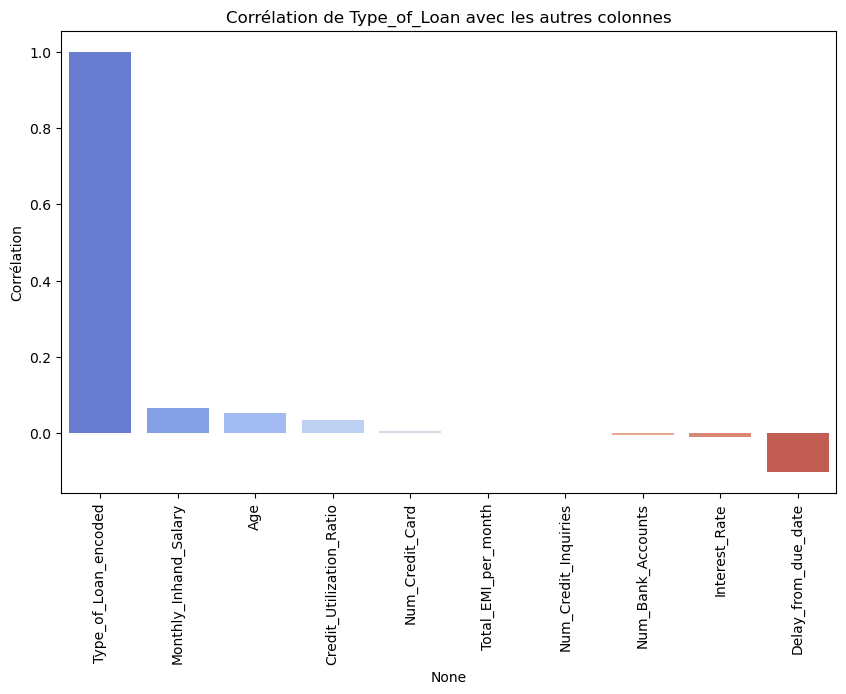

In [47]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

label_encoder = LabelEncoder()
dataset['Type_of_Loan_encoded'] = label_encoder.fit_transform(dataset['Type_of_Loan'].astype(str))

# Calculer les corrélations avec la colonne encodée
correlation_with_loan = dataset.corr(numeric_only=True)['Type_of_Loan_encoded'].sort_values(ascending=False)

# Afficher les résultats
print(correlation_with_loan)

# Visualiser les corrélations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_loan.index, y=correlation_with_loan.values, palette='coolwarm')
plt.title('Corrélation de Type_of_Loan avec les autres colonnes')
plt.xticks(rotation=90)
plt.ylabel('Corrélation')
plt.show()

In [48]:
# Nettoyer la colonne 'Annual_Income'
# 1. Supprimer les underscores (_) et espaces
dataset['Annual_Income_Cleaned'] = dataset['Annual_Income'].astype(str).str.replace('_', '').str.strip()

# 2. Convertir les valeurs nettoyées en type numérique
dataset['Annual_Income_Cleaned'] = pd.to_numeric(dataset['Annual_Income_Cleaned'], errors='coerce')

# Vérifier les valeurs uniques après nettoyage
unique_annual_income_cleaned = dataset['Annual_Income_Cleaned'].unique()

# Trier les valeurs pour un aperçu clair
unique_annual_income_cleaned.sort()

# Afficher les valeurs uniques nettoyées
print(unique_annual_income_cleaned)


[7.0059300e+03 7.0060350e+03 7.0065200e+03 ... 2.4177153e+07 2.4188807e+07
 2.4198062e+07]


In [49]:
# Identifier les lignes avec NaN dans 'Annual_Income_Cleaned'
nan_rows = dataset[dataset['Annual_Income_Cleaned'].isna()]

print("Lignes avec des valeurs NaN après nettoyage :")
print(nan_rows[['Annual_Income']])


Lignes avec des valeurs NaN après nettoyage :
Empty DataFrame
Columns: [Annual_Income]
Index: []


In [50]:
# Nettoyer davantage les valeurs : Supprimer tous les caractères sauf les chiffres et les points
dataset['Annual_Income'] = dataset['Annual_Income'].str.replace('[^0-9.]', '', regex=True)

# Reconvertir en numérique
dataset['Annual_Income_Cleaned'] = pd.to_numeric(dataset['Annual_Income'], errors='coerce')


In [51]:
dataset.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Type_of_Loan_encoded,Annual_Income_Cleaned
count,100000.000000,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,33.293050,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217,3513.769280,1.764157e+05
std,10.773604,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270,1975.132865,1.429618e+06
min,14.000000,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.000000,7.005930e+03
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660,1777.750000,1.945750e+04
50%,33.000000,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473,3463.000000,3.757861e+04
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249,5385.250000,7.279092e+04
max,99.000000,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000,6260.000000,2.419806e+07


In [52]:
# Trouver le salaire mensuel maximum
max_monthly_salary = dataset['Monthly_Inhand_Salary'].max()

# Afficher le résultat
print(f"Le salaire mensuel maximum est : {max_monthly_salary}")


Le salaire mensuel maximum est : 15204.633333333331


In [53]:
# Trouver le salaire mensuel maximum
max_monthly_salary = dataset['Monthly_Inhand_Salary'].max()

# Afficher le résultat
print(f"Le salaire annuel maximum ne doit pas depasser : {max_monthly_salary*12}")


Le salaire annuel maximum ne doit pas depasser : 182455.59999999998


In [54]:
# Remplacer les valeurs d'Annual_Income_Cleaned > 182455.599
threshold = 182455.599

# Remplacer les valeurs aberrantes
dataset['Annual_Income_Cleaned'] = dataset.apply(
    lambda row: row['Monthly_Inhand_Salary'] * 12 if row['Annual_Income_Cleaned'] > threshold else row['Annual_Income_Cleaned'],
    axis=1
)

# Vérifier les mises à jour
print(dataset[['Customer_ID', 'Annual_Income_Cleaned', 'Monthly_Inhand_Salary']])


      Customer_ID  Annual_Income_Cleaned  Monthly_Inhand_Salary
0      CUS_0x1000               30625.94            2706.161667
1      CUS_0x1000               30625.94                    NaN
2      CUS_0x1000               30625.94            2706.161667
3      CUS_0x1000               30625.94            2706.161667
4      CUS_0x1000               30625.94            2706.161667
...           ...                    ...                    ...
99995   CUS_0xffd               41398.44            3749.870000
99996   CUS_0xffd               41398.44            3749.870000
99997   CUS_0xffd               41398.44                    NaN
99998   CUS_0xffd               41398.44            3749.870000
99999   CUS_0xffd               41398.44            3749.870000

[100000 rows x 3 columns]


In [55]:
count()


Column: ID
ID
0x1628a    1
0x17f6c    1
0x2449e    1
0x1434d    1
0x1434c    1
          ..
0x1e83d    1
0x1e83c    1
0x1e83b    1
0x1e83a    1
0x25b01    1
Name: count, Length: 100000, dtype: int64

Column: Customer_ID
Customer_ID
CUS_0x1000    8
CUS_0x8cfe    8
CUS_0x8cbe    8
CUS_0x8cc1    8
CUS_0x8cc5    8
             ..
CUS_0x4f3b    8
CUS_0x4f3e    8
CUS_0x4f41    8
CUS_0x4f43    8
CUS_0xffd     8
Name: count, Length: 12500, dtype: int64

Column: Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

Column: Name
Name
NaN                   9985
Langep                  44
Stevex                  44
Vaughanl                39
Jessicad                39
                      ... 
Marcyb                   4
Olesya Dmitracovaq       4
Vinocurw                 4
Rhys Jonesp              4
Timothyl                 3
Name: count, Length: 10140, dtype: int64

C

In [56]:
# Compter la fréquence de chaque valeur unique dans Num_Bank_Accounts
value_counts_table = dataset['Num_Bank_Accounts'].value_counts().sort_index()

# Convertir en DataFrame pour affichage clair
value_counts_df = value_counts_table.reset_index()
value_counts_df.columns = ['Num_Bank_Accounts', 'Frequency']

# Afficher le tableau complet
print(value_counts_df.to_string(index=False))


 Num_Bank_Accounts  Frequency
                -1         21
                 0       4328
                 1       4490
                 2       4304
                 3      11950
                 4      12186
                 5      12118
                 6      13001
                 7      12823
                 8      12765
                 9       5443
                10       5247
                11          9
                18          1
                26          1
                27          1
                28          3
                29          1
                30          1
                31          1
                32          1
                33          2
                34          4
                35          1
                37          3
                38          1
                39          3
                40          1
                41          1
                42          2
                43          4
                45          1
          

In [57]:
# Réinitialiser l'index pour éviter les conflits
dataset = dataset.reset_index(drop=True)

# Convertir Num_Bank_Accounts en numérique, gérer les erreurs
dataset['Num_Bank_Accounts'] = pd.to_numeric(dataset['Num_Bank_Accounts'], errors='coerce')

# Fonction pour corriger les valeurs aberrantes dans Num_Bank_Accounts
def replace_invalid_accounts(group):
    # Filtrer les valeurs valides (entre 0 et 10 inclus)
    valid_accounts = group['Num_Bank_Accounts'][(group['Num_Bank_Accounts'] >= 0) & (group['Num_Bank_Accounts'] <= 12)]
    if not valid_accounts.empty:
        # Utiliser la première valeur valide trouvée pour remplacement
        replacement_value = valid_accounts.iloc[0]
        group['Num_Bank_Accounts'] = group['Num_Bank_Accounts'].apply(
            lambda x: replacement_value if pd.isnull(x) or x < 0 or x > 12 else x
        )
    return group

# Appliquer uniquement à la colonne 'Num_Bank_Accounts' groupée par Customer_ID
dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_accounts)

# Réinitialiser l'index final
dataset = dataset.reset_index(drop=True)

# Sauvegarder le DataFrame corrigé
dataset.to_csv("num_bank_accounts_corrige.csv", index=False)

print("Les valeurs aberrantes dans 'Num_Bank_Accounts' ont été corrigées.")


C:\Users\adnan\AppData\Local\Temp\ipykernel_40732\1912611631.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_accounts)


Les valeurs aberrantes dans 'Num_Bank_Accounts' ont été corrigées.


In [58]:
dataset.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Type_of_Loan_encoded,Annual_Income_Cleaned
count,100000.000000,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,99853.000000
mean,33.293050,4194.170850,5.368800,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217,3513.769280,50500.235504
std,10.773604,3183.686167,2.593248,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270,1975.132865,38293.100974
min,14.000000,303.645417,0.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.000000,3989.175000
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660,1777.750000,19344.270000
50%,33.000000,3093.745000,5.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473,3463.000000,37006.600000
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249,5385.250000,71677.590000
max,99.000000,15204.633333,11.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000,6260.000000,182006.160000


In [61]:
# Compter la fréquence de chaque valeur unique dans Num_Bank_Accounts
value_counts_table = dataset['Interest_Rate'].value_counts().sort_index()

# Convertir en DataFrame pour affichage clair
value_counts_df = value_counts_table.reset_index()
value_counts_df.columns = ['Interest_Rate', 'Frequency']

# Afficher le tableau complet
print(value_counts_df.to_string(index=False))


 Interest_Rate  Frequency
             1       2683
             2       2465
             3       2765
             4       2589
             5       4979
             6       4721
             7       4494
             8       5012
             9       4494
            10       4540
            11       4428
            12       4540
            13       2384
            14       2229
            15       3992
            16       3730
            17       3813
            18       4102
            19       3630
            20       3929
            21       1560
            22       1720
            23       1683
            24       1685
            25       1566
            26       1489
            27       1608
            28       1616
            29       1662
            30       1690
            31       1457
            32       1742
            33       1467
            34       1502
            59          1
            60          1
            64          1
            

In [79]:
print(dataset[(dataset["Customer_ID"] == "CUS_0x5f90")].Interest_Rate)

42168    14
42169    14
42170    14
42171    14
42172    14
42173    14
42174    14
42175    14
Name: Interest_Rate, dtype: int64


In [ ]:
# Compter la fréquence de chaque valeur unique dans Num_Bank_Accounts
value_counts_table = dataset['Interest_Rate'].value_counts().sort_index()

# Convertir en DataFrame pour affichage clair
value_counts_df = value_counts_table.reset_index()
value_counts_df.columns = ['Interest_Rate', 'Frequency']

# Afficher le tableau complet
print(value_counts_df.to_string(index=False))


In [78]:
# Réinitialiser l'index pour éviter les conflits
dataset = dataset.reset_index(drop=True)

# Convertir Interest_Rate en numérique, gérer les erreurs
dataset['Interest_Rate'] = pd.to_numeric(dataset['Interest_Rate'], errors='coerce')

# Fonction pour corriger les valeurs aberrantes dans Interest_Rate
def replace_invalid_interest_rate(group):
    # Filtrer les valeurs valides (entre 0 et 35 inclus)
    valid_interest = group['Interest_Rate'][(group['Interest_Rate'] >= 0) & (group['Interest_Rate'] <= 35)]
    if not valid_interest.empty:
        # Utiliser la première valeur valide trouvée pour remplacement
        replacement_value = valid_interest.iloc[0]
        group['Interest_Rate'] = group['Interest_Rate'].apply(
            lambda x: replacement_value if pd.isnull(x) or x < 0 or x > 35 else x
        )
    return group

# Appliquer uniquement à la colonne 'Interest_Rate' groupée par Customer_ID
dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_interest_rate)

# Réinitialiser l'index final
dataset = dataset.reset_index(drop=True)

# Sauvegarder le DataFrame corrigé
dataset.to_csv("interest_rate_corrige.csv", index=False)

print("Les valeurs aberrantes dans 'Interest_Rate' ont été corrigées.")


C:\Users\adnan\AppData\Local\Temp\ipykernel_40732\1709041072.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_interest_rate)


Les valeurs aberrantes dans 'Interest_Rate' ont été corrigées.


In [80]:
dataset.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Type_of_Loan_encoded,Annual_Income_Cleaned
count,100000.000000,84998.000000,100000.000000,100000.00000,100000.00000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,99853.000000
mean,33.293050,4194.170850,5.368800,22.47443,14.53208,21.068780,27.754251,32.285173,1403.118217,3513.769280,50500.235504
std,10.773604,3183.686167,2.593248,129.05741,8.74133,14.860104,193.177339,5.116875,8306.041270,1975.132865,38293.100974
min,14.000000,303.645417,0.000000,0.00000,1.00000,-5.000000,0.000000,20.000000,0.000000,0.000000,3989.175000
25%,24.000000,1625.568229,3.000000,4.00000,7.00000,10.000000,3.000000,28.052567,30.306660,1777.750000,19344.270000
50%,33.000000,3093.745000,5.000000,5.00000,13.00000,18.000000,6.000000,32.305784,69.249473,3463.000000,37006.600000
75%,42.000000,5957.448333,7.000000,7.00000,20.00000,28.000000,9.000000,36.496663,161.224249,5385.250000,71677.590000
max,99.000000,15204.633333,11.000000,1499.00000,34.00000,67.000000,2597.000000,50.000000,82331.000000,6260.000000,182006.160000


In [89]:
# Nettoyer davantage les valeurs : Supprimer tous les caractères sauf les chiffres et les points
dataset['Num_of_Loan'] = dataset['Num_of_Loan'].str.replace('[^0-9.]', '', regex=True)

# Reconvertir en numérique
dataset['Num_of_Loan_Cleaned'] = pd.to_numeric(dataset['Num_of_Loan'], errors='coerce')

In [94]:
# Compter la fréquence de chaque valeur unique dans Num_Bank_Accounts
value_counts_table = dataset['Num_of_Loan_Cleaned'].value_counts().sort_index()

# Convertir en DataFrame pour affichage clair
value_counts_df = value_counts_table.reset_index()
value_counts_df.columns = ['Num_of_Loan_Cleaned', 'Frequency']

# Afficher le tableau complet
print(value_counts_df.to_string(index=False))


 Num_of_Loan_Cleaned  Frequency
                   0      10930
                   1      10606
                   2      15032
                   3      15104
                   4      14743
                   5       7197
                   6       7803
                   7       7344
                   8       3191
                   9       3702
                  17          1
                  18          1
                  19          1
                  23          2
                  27          1
                  29          1
                  31          2
                  32          1
                  33          2
                  39          1
                  41          1
                  49          2
                  50          2
                  52          1
                  54          1
                  55          1
                  56          1
                  58          2
                  65          1
                  70          1
        

In [92]:
# Nettoyer davantage les valeurs : Supprimer tous les caractères sauf les chiffres et les points
dataset['Num_of_Loan'] = dataset['Num_of_Loan'].str.replace('[^0-9.]', '', regex=True)

# Reconvertir en numérique
dataset['Num_of_Loan_Cleaned'] = pd.to_numeric(dataset['Num_of_Loan'], errors='coerce')

In [93]:
dataset[(dataset["Num_of_Loan_Cleaned"] == 100)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_encoded,Annual_Income_Cleaned,Num_of_Loan_Cleaned
54,0x1f6e0,CUS_0x1018,July,Felsenthalq,15.0,731-19-8119,Accountant,61194.81,5014.567500,7,...,14 Years and 2 Months,Yes,225.368691,200.29465385973404,Low_spent_Medium_value_payments,355.79340476381844,Poor,1190,61194.81,100
101,0x21d8b,CUS_0x1038,June,B.h,27.0,355-00-7832,Architect,129473.16,NaN,3,...,19 Years and 10 Months,Yes,255.327905,893.8187252311801,Low_spent_Large_value_payments,216.79636977784142,Standard,4718,129473.16,100
150,0x2130,CUS_0x104e,July,Kentaros,50.0,837-93-5062,Teacher,19180.87,1688.405833,8,...,25 Years and 1 Months,No,57.364211,67.91677060720872,Low_spent_Small_value_payments,333.55960171652225,Standard,1459,19180.87,100
209,0x347b,CUS_0x1069,February,Andreas Cremero,32.0,761-27-5143,Accountant,58637.34,NaN,4,...,30 Years and 2 Months,Yes,139.885013,__10000__,High_spent_Medium_value_payments,495.40135939526834,Standard,4953,58637.34,100
229,0x1e86f,CUS_0x1075,June,Dorfmanv,38.0,225-94-8383,Manager,24709.33,1933.468718,5,...,17 Years and 8 Months,NM,196.027162,186.11452687320497,Low_spent_Medium_value_payments,259.1115103930169,Poor,5821,24709.33,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99852,0x1208e,CUS_0xfb6,May,Leah Schnurrj,21.0,668-25-6453,Accountant,42165.91,3658.825833,4,...,30 Years and 5 Months,No,0.000000,75.95539116848389,High_spent_Large_value_payments,529.9271921648494,Standard,6260,42165.91,100
99881,0x19183,CUS_0xfcb,February,Patrick Temple-Westk,24.0,765-35-2455,Lawyer,10805.56,627.463333,5,...,17 Years and 6 Months,No,13.161860,71.59929306861501,Low_spent_Small_value_payments,267.98518027322274,Standard,4139,10805.56,100
99898,0x1d06c,CUS_0xfd1,March,Frewy,31.0,389-55-6408,Architect,78666.56999999999,6485.547500,4,...,22 Years and 0 Months,No,247.851145,189.52837137684742,Low_spent_Medium_value_payments,491.1752339555079,Standard,4015,78666.57,100
99927,0x1fec1,CUS_0xfdf,August,Zhua,56.0,099-84-4997,Mechanic,70114.38,NaN,0,...,NaN,No,131.472173,146.86000235186486,High_spent_Large_value_payments,529.6543248971085,Standard,2158,70114.38,100


In [95]:
# Réinitialiser l'index pour éviter les conflits
dataset = dataset.reset_index(drop=True)

# Convertir Num_of_Loan_Cleaned en numérique, gérer les erreurs
dataset['Num_of_Loan_Cleaned'] = pd.to_numeric(dataset['Num_of_Loan_Cleaned'], errors='coerce')

# Fonction pour corriger les valeurs aberrantes dans Num_of_Loan_Cleaned
def replace_invalid_num_loans(group):
    # Filtrer les valeurs valides (entre 0 et 10 inclus)
    valid_loans = group['Num_of_Loan_Cleaned'][(group['Num_of_Loan_Cleaned'] >= 0) & (group['Num_of_Loan_Cleaned'] <= 10)]
    if not valid_loans.empty:
        # Utiliser la première valeur valide trouvée pour remplacement
        replacement_value = valid_loans.iloc[0]
        group['Num_of_Loan_Cleaned'] = group['Num_of_Loan_Cleaned'].apply(
            lambda x: replacement_value if pd.isnull(x) or x < 0 or x > 10 else x
        )
    return group

# Appliquer uniquement à la colonne 'Num_of_Loan_Cleaned' groupée par Customer_ID
dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_num_loans)

# Réinitialiser l'index final
dataset = dataset.reset_index(drop=True)

# Sauvegarder le DataFrame corrigé
dataset.to_csv("num_of_loans_corrige.csv", index=False)

print("Les valeurs aberrantes dans 'Num_of_Loan_Cleaned' ont été corrigées.")


C:\Users\adnan\AppData\Local\Temp\ipykernel_40732\3924809958.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby(['Customer_ID'], as_index=False).apply(replace_invalid_num_loans)


Les valeurs aberrantes dans 'Num_of_Loan_Cleaned' ont été corrigées.
